In [1]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift

import sys
sys.path.append('..')

import analysis.stats as st
import modules.gait_metrics as gm
import modules.numpy_funcs as nf

load_dir = os.path.join('..', 'data', 'kinect', 'best_pos')
save_dir = os.path.join('..', 'data', 'results')

save_name = 'kinect_gait_metrics.csv'

# All files with .pkl extension
file_paths = glob.glob(os.path.join(load_dir, '*.pkl'))
save_path = os.path.join(save_dir, save_name)

df_metrics = pd.read_csv(save_path, index_col=0)

In [2]:
%matplotlib inline

In [3]:
for file_path in file_paths:
    
    if '2014-12-08_P006_Post_003' in file_path:

        df_head_feet = pd.read_pickle(file_path)

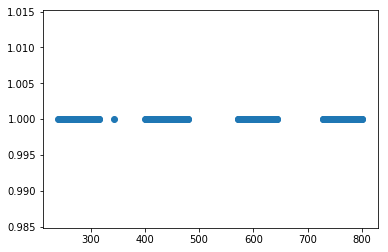

In [4]:
frames = df_head_feet.index
plt.scatter(frames, [1 for _ in frames])

In [15]:
dist_to_foot_l = (df_head_feet.HEAD - df_head_feet.L_FOOT).apply(np.linalg.norm)
dist_to_foot_r = (df_head_feet.HEAD - df_head_feet.R_FOOT).apply(np.linalg.norm)
dist_to_feet = pd.concat([dist_to_foot_l, dist_to_foot_r])

dist_filtered = st.mad_outliers(dist_to_feet, 2)

frames_stacked = np.concatenate((frames, frames))
good_frames = np.unique(frames_stacked[~np.isnan(dist_filtered)])


In [16]:
df_head_feet = df_head_feet.loc[good_frames]

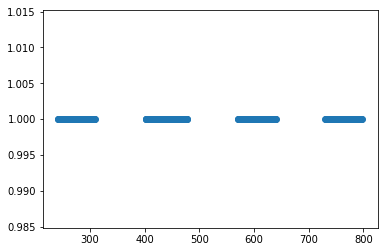

In [17]:
frames = df_head_feet.index
plt.scatter(frames, [1 for _ in frames])